In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.signal import savgol_filter

In [2]:
saxs = np.load('./blends_WSCP_P123_NOpH.npz')

In [6]:
class DataSet:
    def __init__(self, C, q, Iq, N, n_domain=200):
        self.n_domain = n_domain
        self.t = np.linspace(0,1, num=self.n_domain)
        self.N = N
        self.Iq = Iq
        self.C = C
        self.q = q
        
    def generate(self, process=None):
        if process=="normalize":
            self.F = [self.Iq[i]/self.l2norm(self.Iq[i]) for i in range(N)]
        elif process=="smoothen":
            self.F = [self._smoothen(self.Iq[i,:]/self.l2norm(self.Iq[i])) for i in range(self.N)]
        elif process is None:
            self.F = [self.Iq[i] for i in range(N)]
            
        return
        
    def l2norm(self, f):
        norm = np.sqrt(np.trapz(f**2, data.t))
        
        return norm
    
    def _smoothen(self, f):
        f_hat = savgol_filter(f, 8, 3)
        
        return f_hat

q = saxs['q']
n_domain = len(saxs['q'])

C = saxs['C']
Iq = saxs['Iq']

N = C.shape[0]

data = DataSet(C, q, Iq, N, n_domain=n_domain)
data.generate(process="smoothen")
print('Number of functions : ', data.N)
print('Domain sampling of each function : ', n_domain)

Number of functions :  93
Domain sampling of each function :  1304


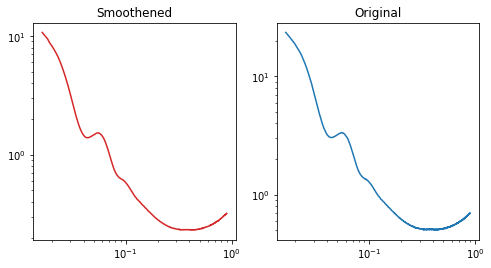

In [4]:
i = np.random.choice(np.arange(data.N))
fig, axs = plt.subplots(1,2, figsize=(4*2, 4))
axs[0].loglog(data.q, data.F[i], 
          color='tab:red')
axs[0].set_title('Smoothened')
axs[1].loglog(data.q, data.Iq[i,:],
           color='tab:blue')
axs[1].set_title('Original')
plt.show()

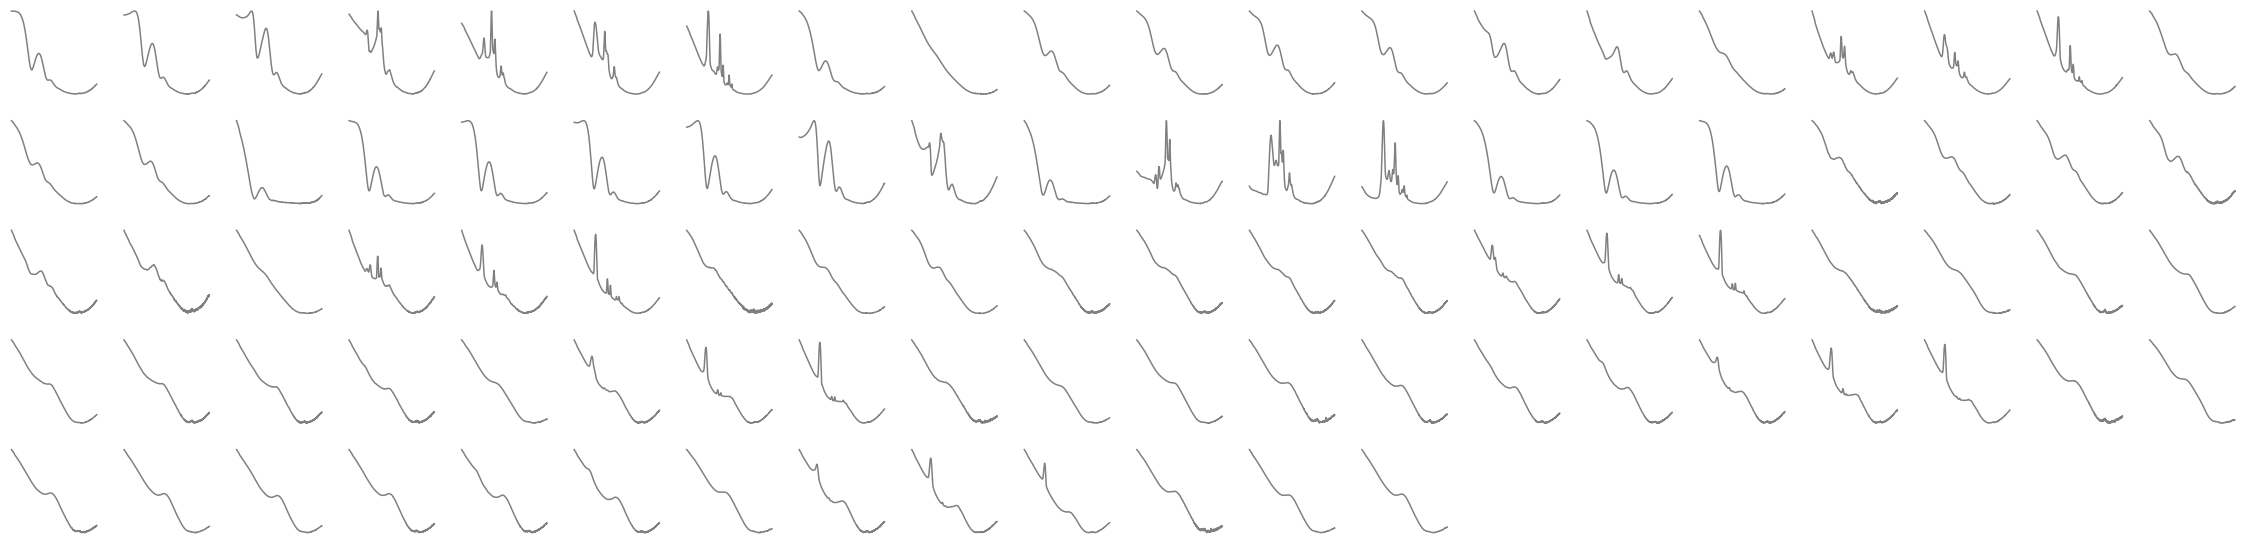

In [5]:
fig, axs = plt.subplots(20,20, figsize=(20*2, 20*2))
axs = axs.flatten()
num_plots = np.min([400, data.N])
[ax.remove() for ax in axs[num_plots:]]
for i in range(num_plots):
    ax = axs[i]
    ax.loglog(data.q, data.F[i], 
                color='grey'
               )    
    ax.axis('off')
plt.show()